# Introduction
**Netflix is not a name unfamiliar to most people. Here are some key statistics why I am enthusaistic about analyzing Netflix.**
- 04 million Netflix streaming subscribers as of Q4 2020 *(Netflix)*
- Netflix users by region in Q4 2020: 74 million US & Canada; 67 million EMEA; 38 million Latin America; 25 million Asia Pacific *(Netflix)*
- Netflix accounts for 34% of US streaming/8.5% of overall viewing *(Nielsen)*
- Netflix US library contains 3,600 movies and 1,800 shows as of February 2021 *(JustWatch)*
- Extraction most viewed Netflix Originals film as of January 2021, with 99 million views in first month *(Netflix via  What’s on Netflix)*
- The Office most streamed Netflix (and overall) series in the US over 2020, with a total of 57.1 billion minutes *(Nielsen)*
- Total Netflix 2020 revenue came to 25 billion, up from 20 billion in 2019 *(Netflix)*

In [12]:
#Importing data and required libraries
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/Users/ayonikabose/Documents/GitHub/analysis_of_netflix_titles")
data = pd.read_csv("netflix_titles.csv")
df = pd.DataFrame(data, index = None)
data.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
841,s842,Movie,"Berlin, Berlin: Lolle on the Run",Franziska Meyer Price,"Felicitas Woll, Janina Uhse, Jan Sosniok, Matt...",Germany,"August 7, 2020",2020,TV-MA,82 min,"Comedies, International Movies","In this cinematic sequel to the hit TV series,..."
2863,s2864,Movie,Humpty Sharma Ki Dulhania,Shashank Khaitan,"Varun Dhawan, Alia Bhatt, Ashutosh Rana, Sidha...",India,"April 1, 2020",2014,TV-14,131 min,"Comedies, International Movies, Romantic Movies",A small-town girl heads to Delhi to find a des...
627,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,PG-13,95 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",When diabolical genius Dr. Evil travels back i...
1635,s1636,Movie,David Brent: Life on the Road,Ricky Gervais,"Ricky Gervais, Doc Brown, Tom Basden, Jo Hartl...","United Kingdom, United States","February 10, 2017",2016,TV-MA,97 min,"Comedies, International Movies","With ""The Office"" long in the past, middling s..."
988,s989,TV Show,Blood of Zeus,NaN,"Derek Phillips, Jason O'Mara, Claudia Christia...",United States,"October 27, 2020",2020,TV-MA,1 Season,Anime Series,"A commoner living in ancient Greece, Heron dis..."


To get an idea, here are 5 random rows from the data! Can't wait to gain some insights *muscle emoji here please!*

In [13]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("There are " + str(rows) + " rows and " + str(cols) + " columns in the data")

There are 7787 rows and 12 columns in the data


In [14]:
#Let's clean some of the data! 
data.isnull().sum()

show_id        0
type           0
              ..
listed_in      0
description    0
Length: 12, dtype: int64

In [16]:
#Using this code helps us remove all the NA values that was present in the data. We dropped almost 3000 rows phew! 
df.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


/Users/ayonikabose/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ayonikabose/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


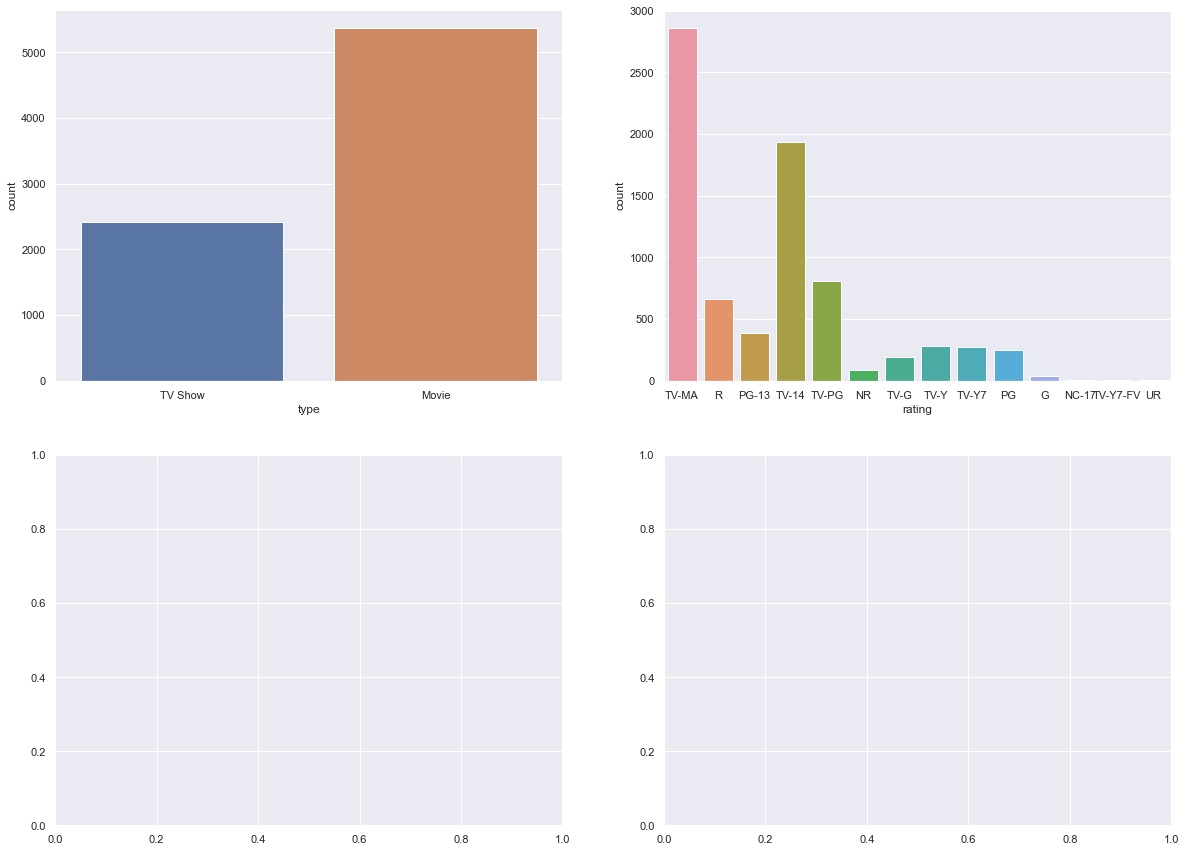

In [41]:
f, ax = plt.subplots(2,2,figsize=(20,15))
vis1 = sns.countplot(data["type"], ax= ax[0][0])
vis2 = sns.countplot(data["rating"], ax=ax[0][1])